# 함수형 API를 사용해 복잡한 Model 만들기

## 1. Keras의 Model

* 모든 neural network models들이 sequential은 아님
* 어떤 neural network models들은 더 복잡한 형태일 수 있음<br> 
$ \ \ $ $\checkmark \ $ multiple inputs과 multiple outputs을 가지는 model
* 예를들면 Wide & Deep neural network은 입력의 일부 또는 전체가 출력과 연결되어 있음. [paper]https://ai.google/research/pubs/pub45413


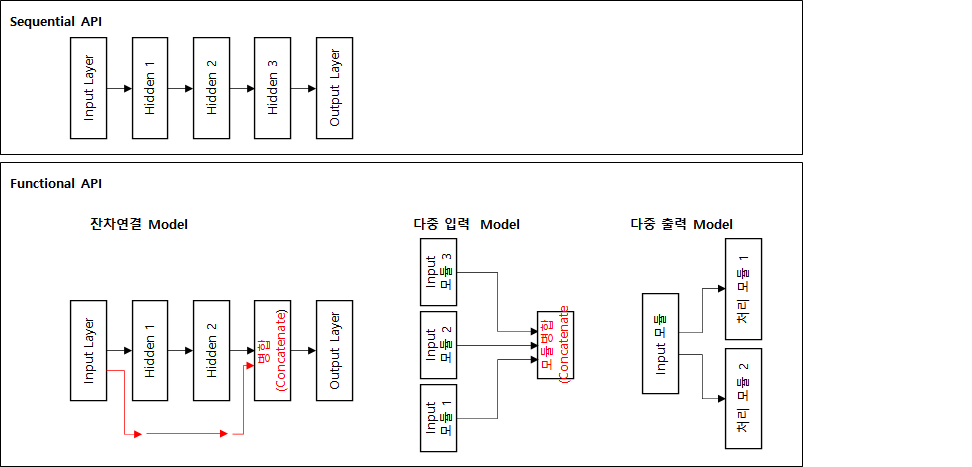

- Deep Neural Network이 General Approximation이라는 점을 상기한다면 다음과 같은 문제를 다룰 수 있다는 것임

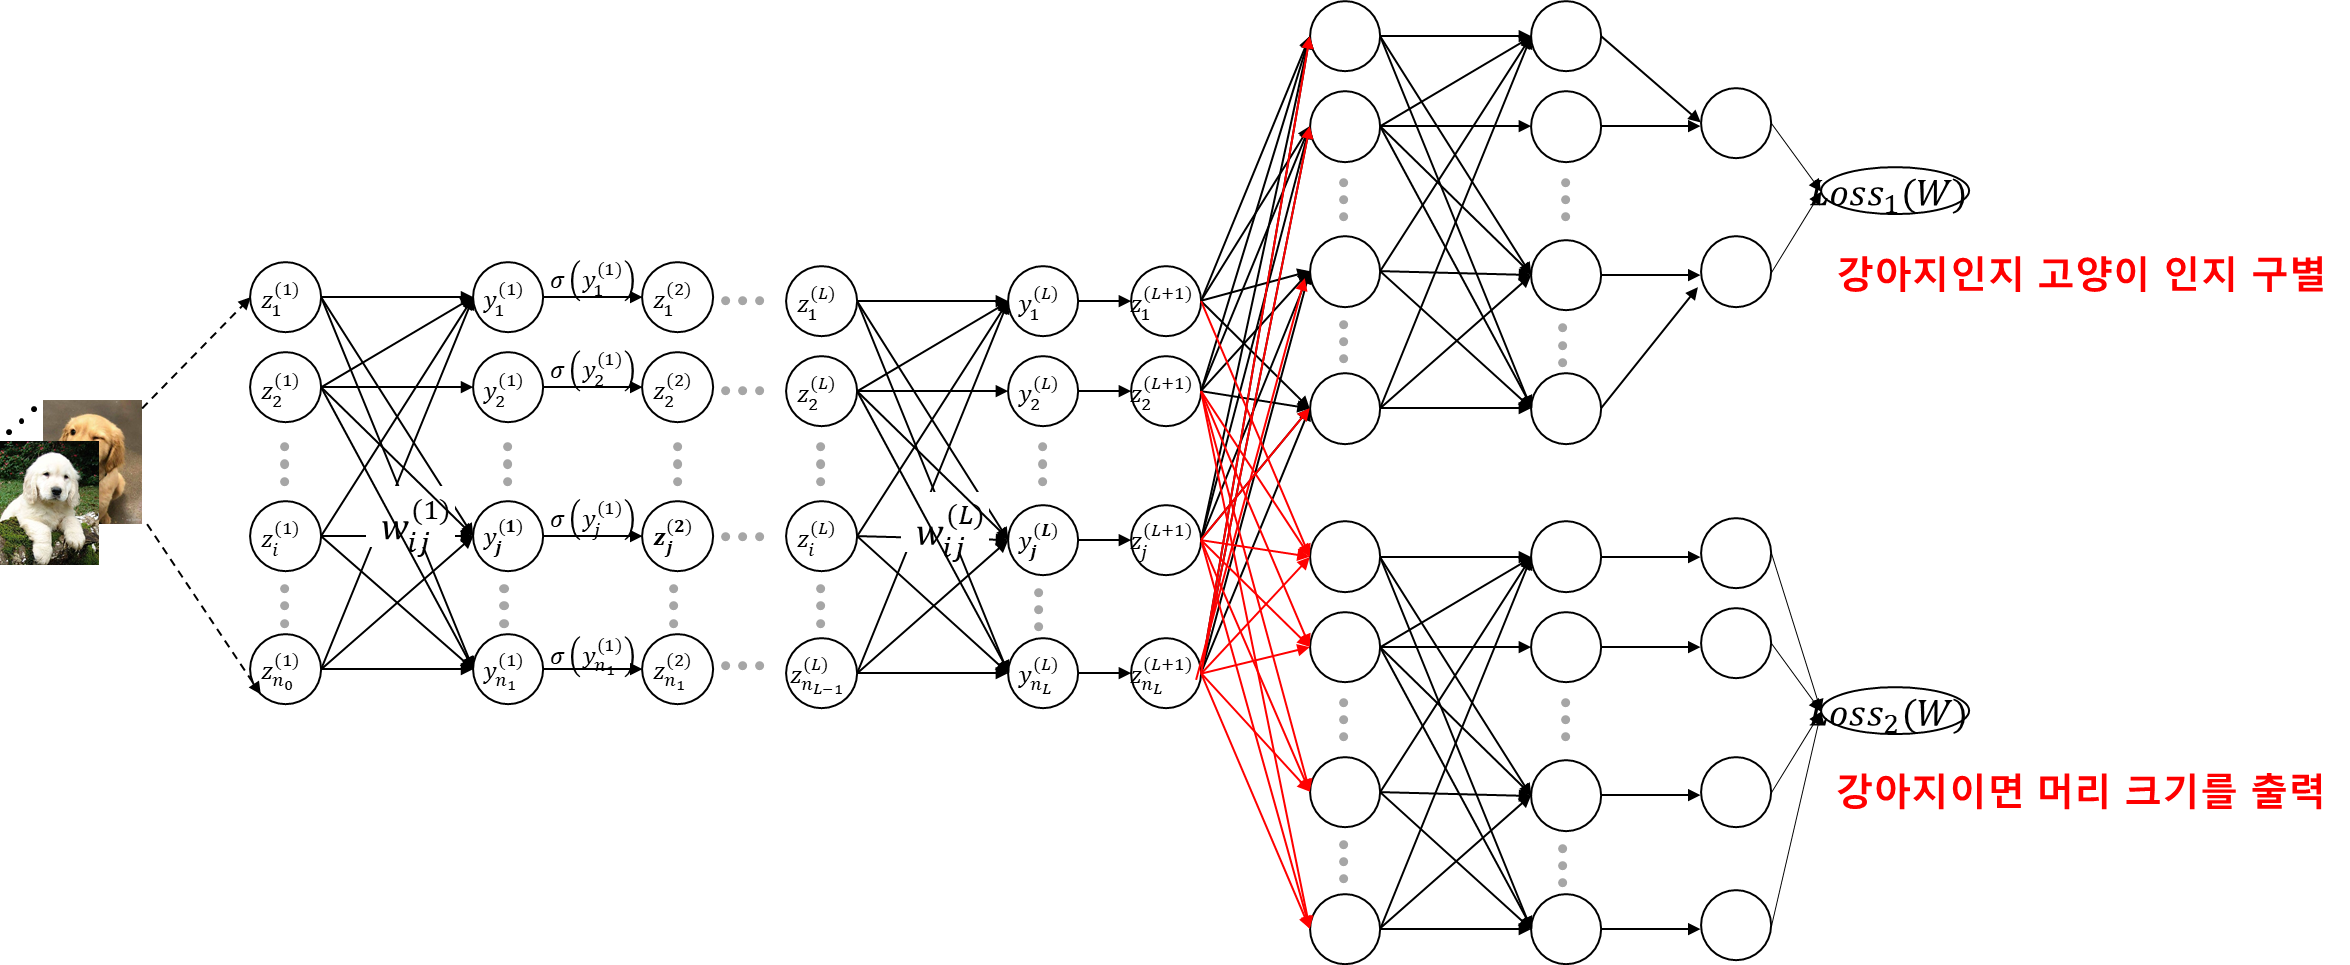

* keras Functional API의 구성
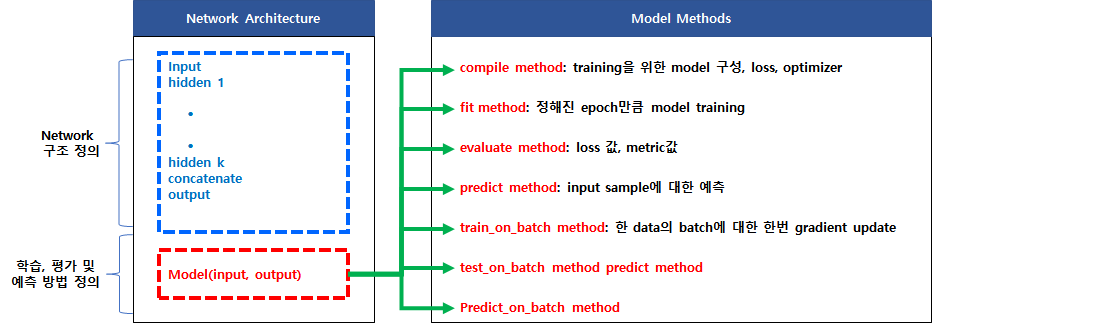

## 2. Functional API를 사용한 예제

[자료] Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition

### 2.1 California Housing Dataset의 이해

- Machine Leaning문제는 Classification문제와 Regression문제로 구분할 수 있음<br>
- fashionMNIST      : Classification문제<br>
- California housing: Regression문제임

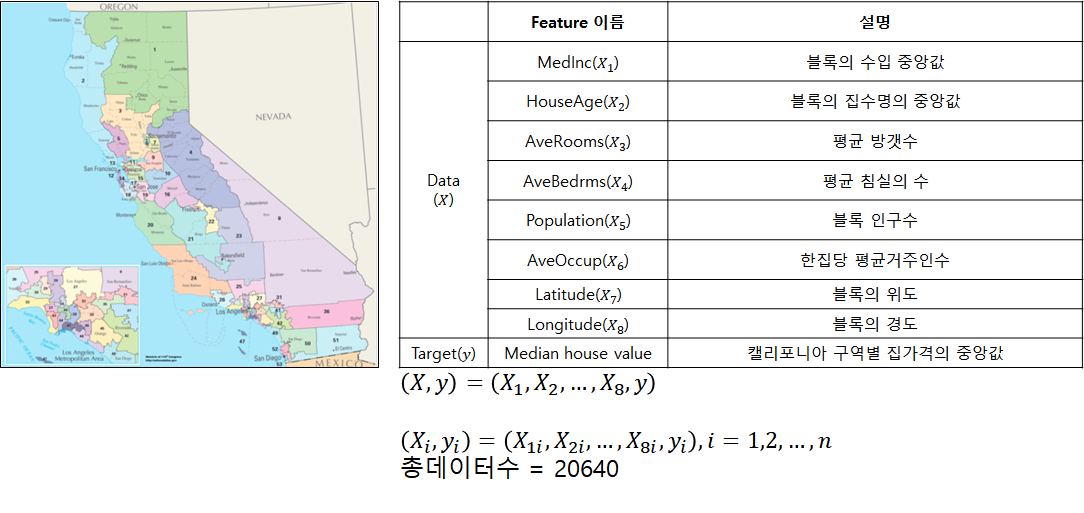

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test \
         = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid  \
         = train_test_split(X_train_full, y_train_full, random_state=42)

# X변수만 Scaling한 것. y변수는 Scaling이 필요없음
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

import numpy as np
import tensorflow as tf
from tensorflow import keras
#from keras.models import Model
#from keras.layers import Input, Dense

X_train.shape, X_train.shape[0], X_train.shape[0:], X_train.shape[1:]  # 2차원 tuple임

((11610, 8), 11610, (11610, 8), (8,))

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
X_train.shape[1:]  # california housing dataset의 feature변수 수는 8개임

(8,)

### 2.2  $Residual \ Net$

* Network Architecture
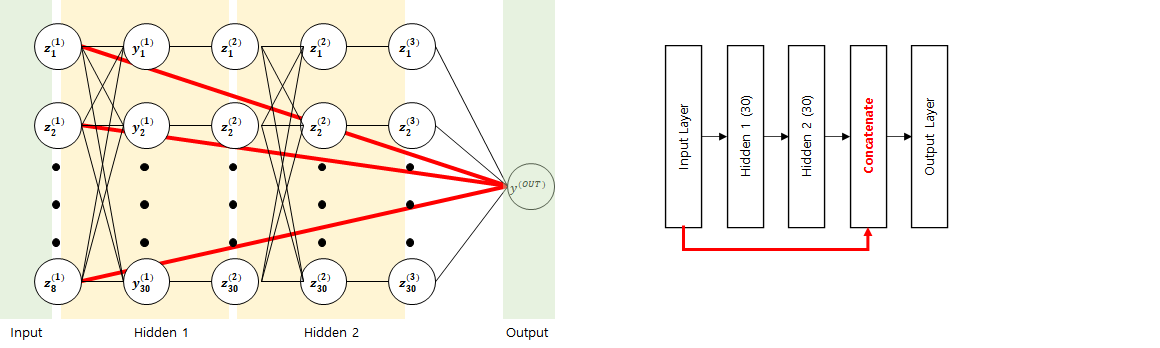

In [4]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

In [5]:
model.summary()   # input이 마지막으로 연결되는 부위에는 parameters가 없음

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

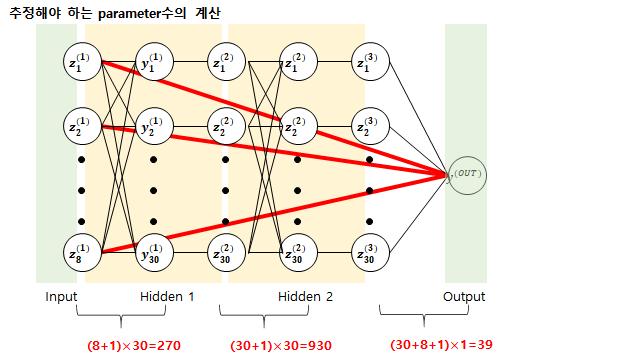

### 2.3 compile(optimizer, loss=None, metrics=None, loss_weight=None, sample_weight_mode=None, weight_metrics=None, target_tensor=None )

https://keras.io/ko/models/model/
- optimizer: 문자열 (옵티마이저의 이름) 혹은 옵티마이저 인스턴스 

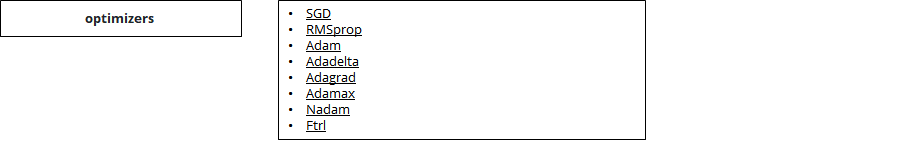

- loss: 문자열 (목적 함수의 이름) 혹은 목적 함수


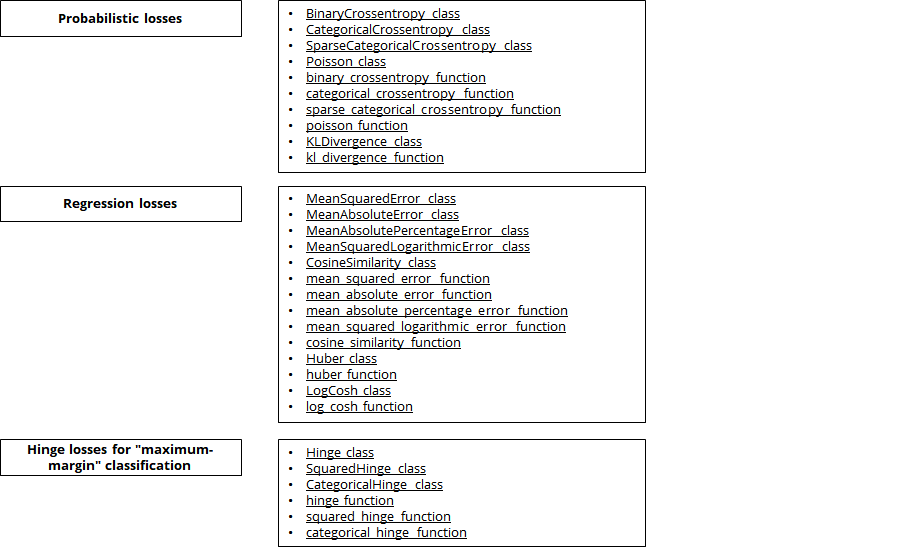

$ \qquad $ $\checkmark \ $ Model이 다중 output을 갖는 경우, loss의 list 혹은 loss의 dictionary를 전달하여 각 output에 각기 다른 <br> $\qquad \quad $  loss을 사용할 수 있음 <br> $\qquad \quad \ \ $ $\cdots$ 따라서 model에 의해 최소화되는 loss 값은 모든 개별적 loss의 합이 됨.<br>
- metrics: 학습과 테스트 과정에서 model이 평가할 측정항목의 list <br>
$ \ \ $ $\checkmark \ $ 보통은 metrics=['accuracy']를 사용<br>
$ \ \ $ $\checkmark \ $ 다중 output model의 각 output에 각기 다른 측정항목을 특정하려면, metrics={'output_a': 'accuracy'}와 같은   <br> $\quad \ \  $ dictionary를 전달할 수도 있음<br>
- loss_weights: 각기 다른 model output의 loss 기여도에 가중치를 부여하는 스칼라 계수(파이썬 부동소수점)를 특정하는 선택적 list 혹은 dictionary. <br>
$ \ \ $ $\checkmark \ $ 따라서 model이 최소화할 loss 값은 loss_weights 계수에 의해 가중치가 적용된 모든 개별 loss의 합이 됨<br>
$ \ \ $ $\checkmark \ $ list의 경우 model의 output에 1:1 매핑을 가져야 하며, 텐서의 경우 output 이름(문자열)을 스칼라 계수에   <br> $\quad \ \  $ 매핑해야 함<br>
- sample_weight_mode: 시간 단계별로 샘플 가중치를 주어야 하는 경우 (2D 가중치)<br> 
$ \ \ $ $\checkmark \ $ 이 인수를 "temporal"로 설정함 <br>
$ \ \ $ $\checkmark \ $ 디폴트 값은 None으로 (1D) 샘플별 가중치를 적용<br>
$ \ \ $ $\checkmark \ $ model이 다중 output을 갖는 경우 모디의 list 혹은 모드의 dictionary를 전달하여 각 output에 별도의   <br> $\quad \ \  $ sample_weight_mode를 사용할 수 있음<br>
- weighted_metrics: 학습 혹은 테스트 과정에서 sample_weight 혹은 class_weight로 가중치를 주고 평가할 측정항목의 list<br>
- target_tensors: Keras는 디폴트 설정으로 model의 표적을 위한 플레이스 홀더를 만들고, 학습 과정 중 이 플레이스 홀더에 표적 데이터를 채움<br>
$ \ \ $ $\checkmark \ $ 이러한 디폴트 설정 대신 직접 만든 표적 텐서를 사용하고 싶다면 (이 경우 Keras는 학습 과정 중 이러한 표적의   <br> $\quad \ \  $ 외부 Numpy 데이터를 기대하지 않습니다), target_tensors 인수를 통해서 그 표적 텐서를 특정할 수 있음<br>
$ \ \ $ $\checkmark \ $ 표적 텐서는 (단일 output model의 경우) 단일 텐서, 텐서 list, 혹은 표적 텐서에 output 이름을 매핑하는   <br> $\quad \ \  $ dictionary가 될 수 있음<br>
- \**kwargs: Theano/CNTK 백엔드를 사용하는 경우, 이 인수는 K.function에 전달<br>
$ \ \ $ $\checkmark \ $ 텐서플로우 백엔드를 사용하는 경우, 이는 tf.Session.run에 전달<br>

In [6]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))  # lr=learning rate

C:\Users\admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 980us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 962us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 981us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 972us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 936us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 948us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 992us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 978us/step - loss: 0.4659 - 

In [8]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 673us/step - loss: 0.4032


In [9]:
X_new = X_test[:3]  # X_test를 Slicing 0, 1, 2

In [10]:
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 74ms/step


In [11]:
y_pred 

array([[0.47008744],
       [1.8735241 ],
       [3.3798466 ]], dtype=float32)

### 2.4 복수개 입력

- 다음 그림과 같이 일부 특성은 짧은 경로로 전달하고 일부 특성은 깊은 경로로 전달하는 경우를 생각해 봄

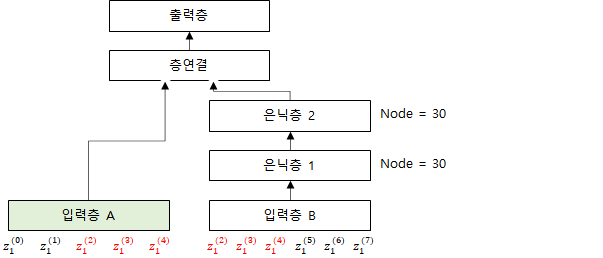

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [14]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [15]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.7725 - main_output_loss: 1.7029 - aux_output_loss: 2.0696 - val_loss: 2.7714 - val_main_output_loss: 1.4621 - val_aux_output_loss: 1.3093
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.8164 - main_output_loss: 0.6610 - aux_output_loss: 1.1554 - val_loss: 1.8724 - val_main_output_loss: 0.7745 - val_aux_output_loss: 1.0978
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 1.5857 - main_output_loss: 0.5788 - aux_output_loss: 1.0069 - val_loss: 1.5668 - val_main_output_loss: 0.5771 - val_aux_output_loss: 0.9897
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 1.4185 - main_output_loss: 0.5348 - aux_output_loss: 0.8837 - val_loss: 1.3607 - val_main_output_loss: 0.5107 - val_aux_output_loss: 0.8500
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 1.2900 - main_output_loss: 0.5035 - aux_output_loss: 0.7865 - val_loss

In [19]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

162/162 [==============================] - 0s 776us/step - loss: 0.9254 - main_output_loss: 0.3995 - aux_output_loss: 0.5259


In [20]:
y_pred 

[array([[0.43130648],
        [1.8719785 ],
        [3.3147922 ]], dtype=float32),
 array([[0.9237088],
        [2.1996212],
        [2.981987 ]], dtype=float32)]

### 2.5 복수개 출력

- 분류와 좌표 data를 동시에 알고자할 때<br>
- 동일한 dataset을 이용하여 여러 작업을 수행하는 경우<br>
$\quad$ $\checkmark \ $ 출력1: 표정분류<br>
$\quad$ $\checkmark \ $ 출력2: 안경을 썼는지 구별<br>
- 규제 기법으로 사용하는 경우<br>
$\quad$ $\checkmark \ $ 과대적합을 감소하고 model의 일반화 성능을 높이도록 훈련에 제약을 가함

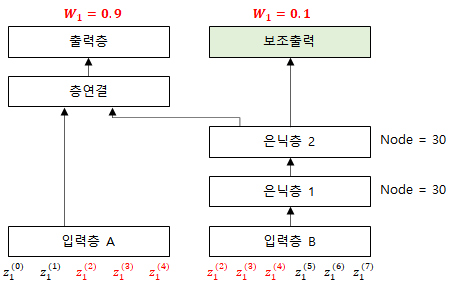

In [18]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [19]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4191 - main_output_loss: 0.4050 - aux_output_loss: 0.5454 - val_loss: 0.4128 - val_main_output_loss: 0.3860 - val_aux_output_loss: 0.6546
Epoch 2/20
363/363 [==============================] - 0s 945us/step - loss: 0.4180 - main_output_loss: 0.4039 - aux_output_loss: 0.5448 - val_loss: 0.4297 - val_main_output_loss: 0.4023 - val_aux_output_loss: 0.6766
Epoch 3/20
363/363 [==============================] - 0s 979us/step - loss: 0.4171 - main_output_loss: 0.4030 - aux_output_loss: 0.5443 - val_loss: 0.4176 - val_main_output_loss: 0.3900 - val_aux_output_loss: 0.6655
Epoch 4/20
363/363 [==============================] - 0s 880us/step - loss: 0.4151 - main_output_loss: 0.4008 - aux_output_loss: 0.5442 - val_loss: 0.4192 - val_main_output_loss: 0.3920 - val_aux_output_loss: 0.6634
Epoch 5/20
363/363 [==============================] - 0s 979us/step - loss: 0.4149 - main_output_loss: 0.4007 - aux_output_loss: 0.5428 - 

In [20]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 723us/step - loss: 0.3964 - main_output_loss: 0.3825 - aux_output_loss: 0.5209


In [21]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [22]:
y_pred_main, y_pred_aux

(array([[0.575347 ],
        [1.9736842],
        [3.5570693]], dtype=float32),
 array([[0.88178337],
        [2.2625399 ],
        [3.1057696 ]], dtype=float32))

##### 서로 다른 Model에 의한 예측치 비교

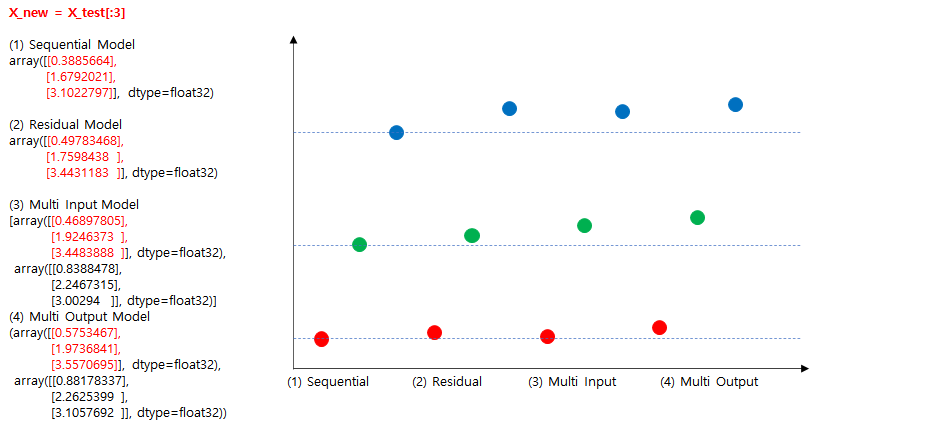

### 2.6 서브클래싱 API로 동적 Model만들기

* Sequential API와 함수형 API는 model에 대해 선언을 해주어야함<br>
  \- 장점: model의 저장, 복사 및 공유가 쉬움, model 구조의 출력 및 분석이 쉬움, Error 발견이 용이<br>
  \- 단점: 정적(Static)한 분석 model임<br>
* 단점 극복의 방법으로 subclassing API를 사용<br>
  \- class를 상속한 다음 생성자 안에 필요한 층을 생성<br>
  \- call method 안에 수행하려는 연산을 기술

In [23]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [24]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 0s 977us/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 0s 996us/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.5964 - 

In [25]:
model = WideAndDeepModel(30, activation="relu")

In [26]:
model.summary

<bound method Model.summary of <__main__.WideAndDeepModel object at 0x000001D4E3A2A9D0>>

## 2.7 Model 저장과 복원

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [29]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 976us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 760us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 861us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 783us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 852us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 759us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 870us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 906us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 830us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 487us/step - loss: 0.438

In [30]:
model.save("my_keras_model.h5")

In [31]:
model = keras.models.load_model("my_keras_model.h5")

In [32]:
model.predict(X_new)

array([[0.5400235],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [33]:
model.save_weights("my_keras_weights.ckpt")

In [34]:
model.load_weights("my_keras_weights.ckpt")

### 2.8 콜백 사용하기

In [35]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [37]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 873us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 829us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 871us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 864us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 809us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 929us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 911us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 977us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 528us/step - loss: 0.4382


In [38]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 978us/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 749us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 784us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 766us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 786us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 871us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 930us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 882us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 931us/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 960us/step - l

Epoch 80/100
363/363 [==============================] - 0s 827us/step - loss: 0.3329 - val_loss: 0.3352
Epoch 81/100
363/363 [==============================] - 0s 792us/step - loss: 0.3324 - val_loss: 0.3277
Epoch 82/100
363/363 [==============================] - 0s 729us/step - loss: 0.3320 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 0s 714us/step - loss: 0.3317 - val_loss: 0.3280
Epoch 84/100
363/363 [==============================] - 0s 742us/step - loss: 0.3312 - val_loss: 0.3636
Epoch 85/100
363/363 [==============================] - 0s 722us/step - loss: 0.3310 - val_loss: 0.3175
Epoch 86/100
363/363 [==============================] - 0s 722us/step - loss: 0.3308 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 0s 766us/step - loss: 0.3305 - val_loss: 0.3530
Epoch 88/100
363/363 [==============================] - 0s 804us/step - loss: 0.3299 - val_loss: 0.3256
Epoch 89/100
363/363 [==============================] - 0s 752us

In [39]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [40]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 0s 778us/step - loss: 0.3302 - val_loss: 0.3560

val/train: 1.08


### 2.9  TensorBoard사용해 시각화하기

In [41]:
root_logdir = os.path.join(os.curdir, "my_logs")

NameError: name 'os' is not defined

In [ ]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [ ]:
run_logdir2 = get_run_logdir()
run_logdir2

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

In [ ]:
help(keras.callbacks.TensorBoard.__init__)

### 3. Hyperparameter 튜닝

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
mse_test = keras_reg.score(X_test, y_test)

In [ ]:
y_pred = keras_reg.predict(X_new)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)